# **PHISHING LINK DETECTION**

## Drive Mount
Menghubungkan dengan google drive

In [24]:
# menghubungkan dengan Database
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library
Mengimport library yang dibutuhkan


In [25]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


## Loading Data
Memasukkan dataset

In [27]:
# Path file arff pada google collab
arff_file = "/content/drive/MyDrive/DATA_TSDN/Training Dataset.arff"
#kalau error kasih space di My Drive

# Membaca file ARFF
isi_data, meta = arff.loadarff(arff_file)

# Mengonversi data ARFF ke DataFrame pandas
data = pd.DataFrame(isi_data)

#Menghilangkan b
def decode_bytes(byte_str):
    return int(byte_str.decode('utf-8'))

data = data.applymap(decode_bytes)

## EDA & Familiarizing Data
Melakukan Exploratory Data Analysis (EDA)

In [28]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [29]:
y = data[['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'Result']]
y.head(3)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,Result
0,-1,1,1,1,-1
1,1,1,1,1,-1
2,1,0,1,1,-1


In [30]:
# Jumlah baris dan kolom data (shape)
print("dimensi data adalah",data.shape)

dimensi data adalah (11055, 31)


In [31]:
# List fitur data
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [32]:
# Informasi mengenai data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [33]:
# Memeriksa Missing Value
missing_value = data.isnull().sum()
data_null = pd.DataFrame(missing_value, columns=['Jumlah Null'])
print(f"Jumlah data kosong: {sum(missing_value)}")

Jumlah data kosong: 0


In [34]:
# Skala masih masih fitur (-1, 0, 1)
data.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [35]:
# Statistik Deskriptif pada fitur data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


<Axes: >

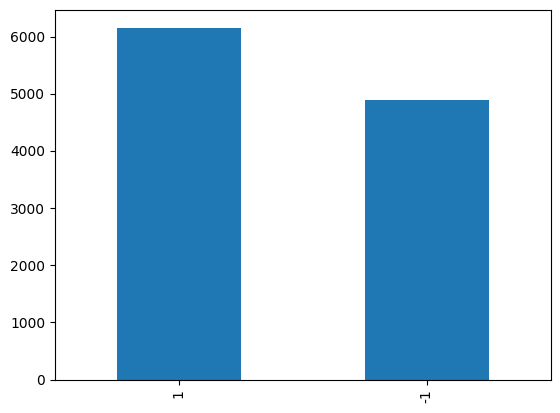

In [36]:
# Cek jumlah penyebaran antara link phising dan non phising
data['Result'].value_counts().plot(kind='bar')

## Correlation Analysis & Visualization
Menganalisis korelasi antar fitur dan melakukan visualisasi data

In [37]:
# Corelasi
def corr_heatmap(data, idx_s, idx_e):
    plt.figure(figsize=(15,15))
    y = data['Result']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['Result'] = y
    sns.heatmap(temp.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

<ipython-input-37-a57e921cc7d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


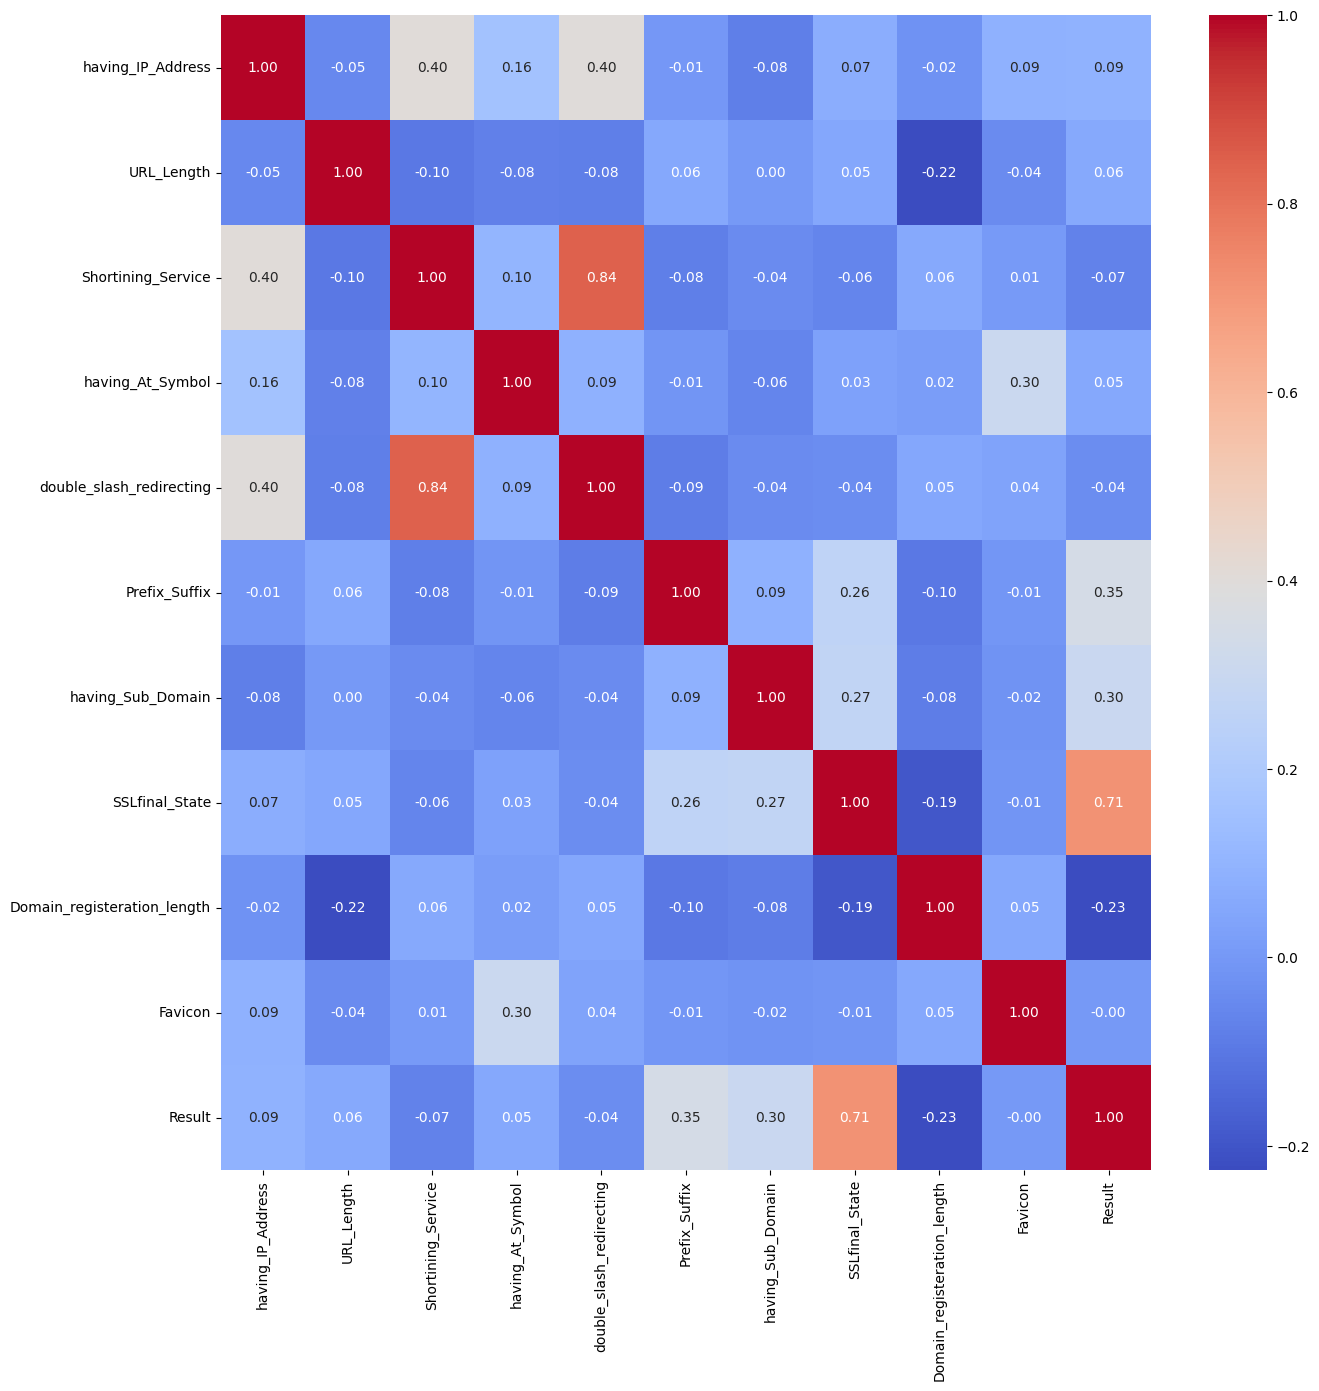

In [38]:
corr_heatmap(data, 0, 10)

<ipython-input-37-a57e921cc7d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


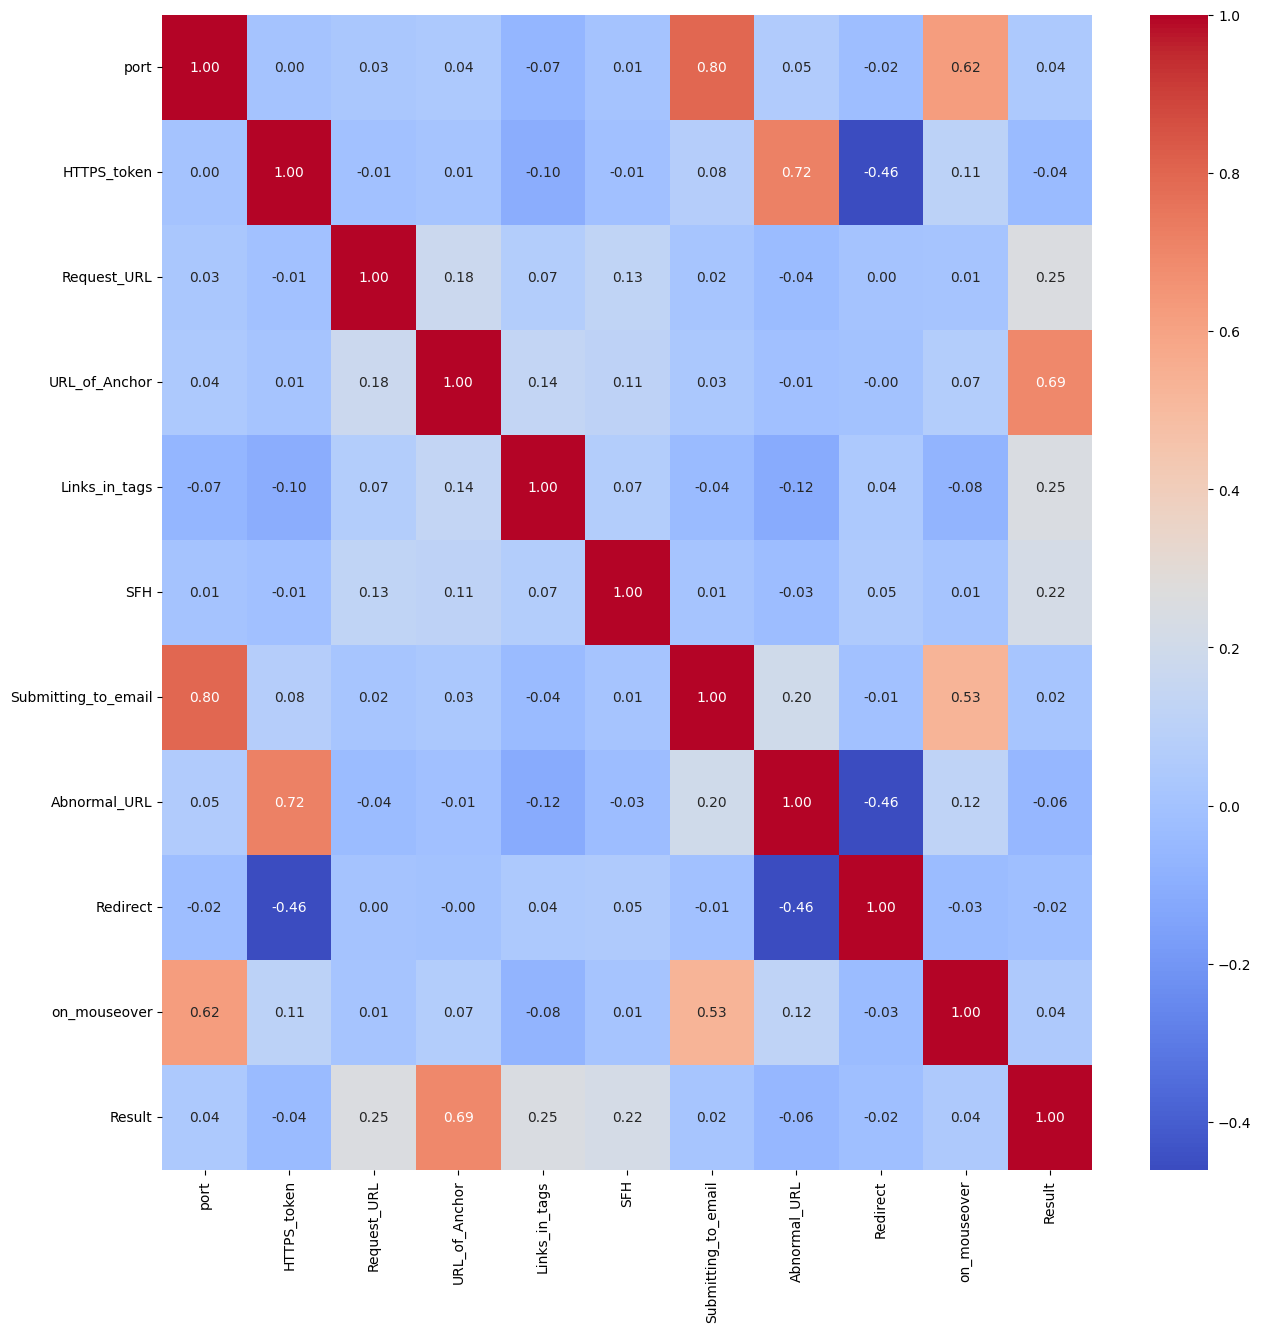

In [39]:
corr_heatmap(data, 10, 20)

<ipython-input-37-a57e921cc7d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


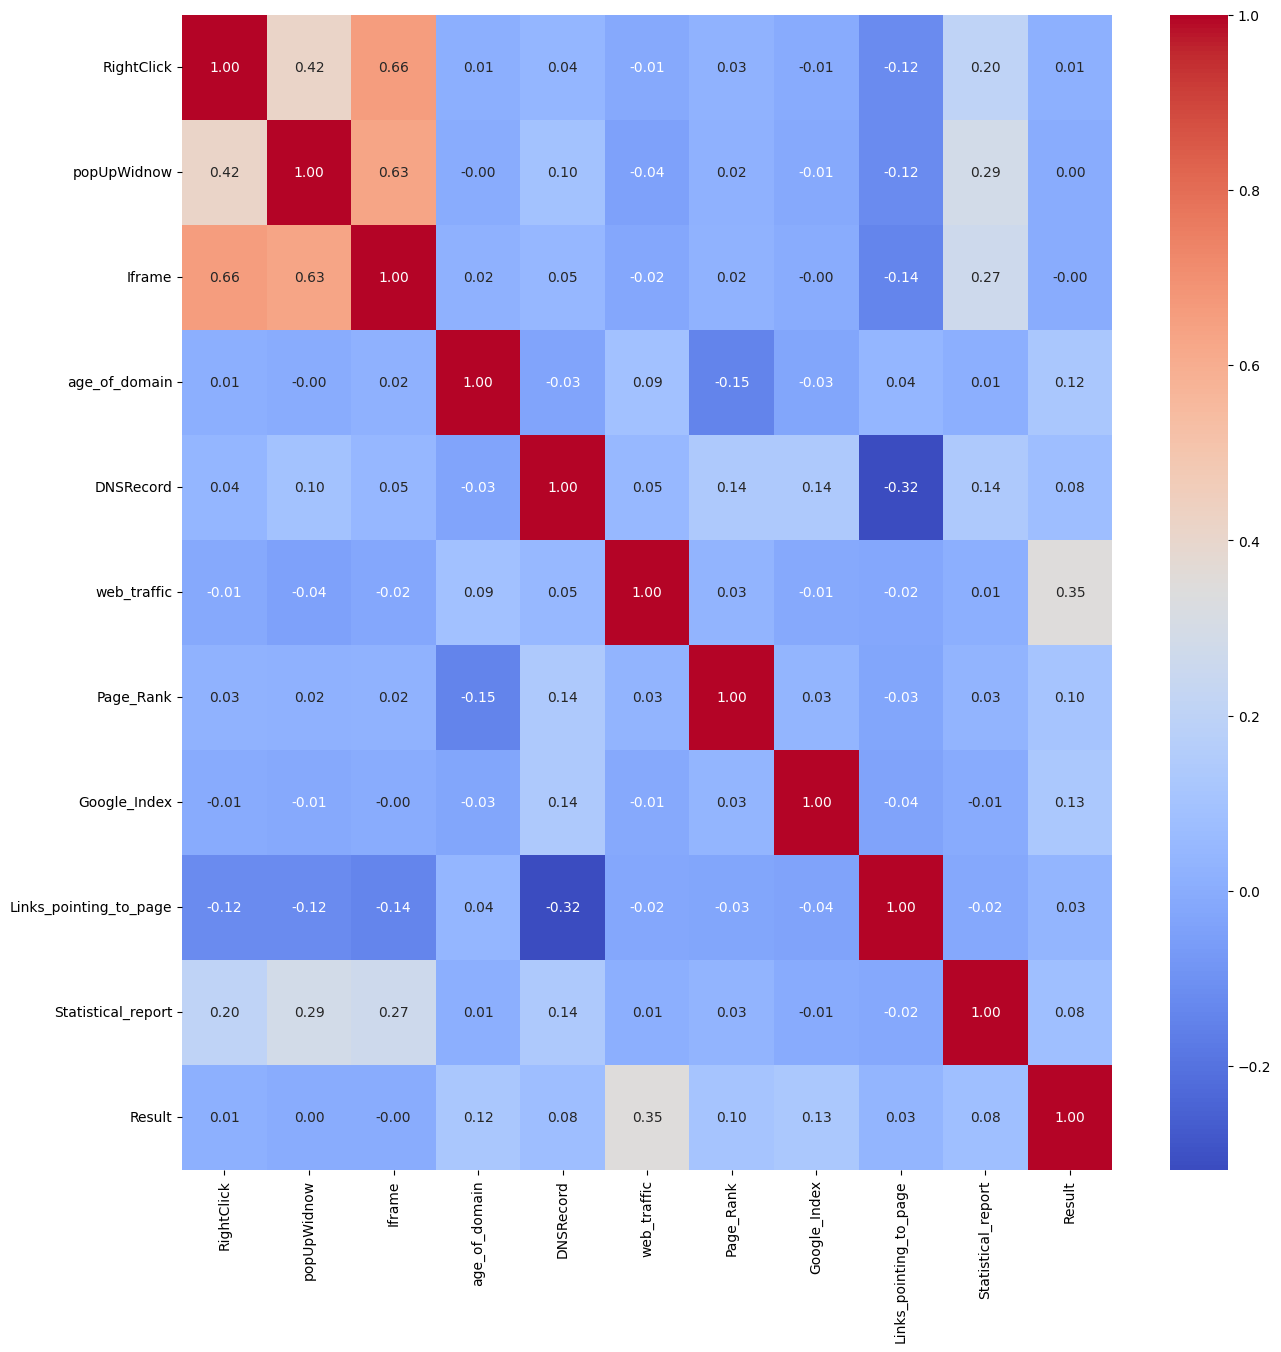

In [40]:
corr_heatmap(data, 20, 30)

In [41]:
corr=data.corr()

In [42]:
incCorr=corr.sort_values(by='Result',ascending=False)

In [43]:
incCorr['Result']
incCorr

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
Result,0.094160,0.057430,-0.067966,0.052948,-0.038608,0.348606,0.298323,0.714741,-0.225789,-0.000280,...,0.000086,-0.003394,0.121496,0.075718,0.346103,0.104645,0.128950,0.032574,0.079857,1.000000
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
URL_of_Anchor,0.099847,-0.023396,0.000561,0.057914,-0.005036,0.348871,0.229491,0.535786,-0.160257,0.037698,...,0.041150,0.013403,0.075508,0.093288,0.326293,0.099261,0.038816,0.018651,0.077377,0.692935
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
web_traffic,0.002922,0.008993,-0.047074,0.032918,-0.062369,0.110598,-0.005764,0.258768,-0.134454,-0.050922,...,-0.043190,-0.022080,0.089949,0.048650,1.000000,0.030984,-0.012584,-0.019860,0.009223,0.346103
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
Request_URL,0.029773,0.246348,-0.037235,0.027909,-0.026368,0.098675,0.104857,0.193054,-0.609970,-0.004620,...,-0.004622,0.016934,0.090455,0.015933,0.161166,0.055734,0.046409,-0.067109,0.035412,0.253372
Links_in_tags,0.006212,0.052869,-0.133379,-0.070861,-0.125583,0.100254,0.093646,0.176825,-0.101084,-0.100341,...,-0.112282,-0.070030,0.078057,-0.038545,0.064548,-0.006450,0.045557,0.013561,-0.087343,0.248229
SFH,-0.010962,0.414196,-0.022723,-0.008672,-0.041672,0.001326,0.096089,0.171402,-0.136422,-0.012279,...,-0.004863,0.007067,-0.015840,0.034440,0.052706,0.001979,0.027588,-0.009068,-0.005289,0.221419
Google_Index,0.029153,0.002902,0.155844,0.037061,0.178415,0.067781,0.057673,0.096051,-0.039766,-0.016668,...,-0.010256,-0.003519,-0.028471,0.137509,-0.012584,0.032431,1.000000,-0.038777,-0.005103,0.128950


## Split data
Menjadi data latih dan data uji

In [44]:
# Import Library
from sklearn.model_selection import train_test_split

In [45]:
# Memisahkan atribut dan target
X = data.drop('Result', axis=1)  # Atribut
y = data['Result']  # Target

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Jumlah masing masing data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8844, 30), (8844,), (2211, 30), (2211,))

## Model Bulding & Training
Mengimplementasikan model model machine learning

In [46]:
# Import Library Machine Learning

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

In [47]:
# Inisiasi array untuk menyimpan hasil performa
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

# fungsi untuk menyimpan hasil
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

### Logistic Regression

In [48]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

# Memprediksi nilai target dari model
y_train_log = log_model.predict(X_train)
y_test_log = log_model.predict(X_test)

# Menghitung performa
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)

In [49]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_log))

# Menyimpan hasil
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



### K-Nearest Neighbors

In [50]:
# K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

# Memprediksi nilai target dari model
y_train_knn = knn_model.predict(X_train)
y_test_knn = knn_model.predict(X_test)

# Menghitung performa
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)

In [51]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_knn))

# Menyimpan hasil
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       956
           1       0.94      0.95      0.95      1255

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



### Support Vector Machine

In [52]:
# Mendefinisikan range parameter
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

# Support Vector Classifier model
svc_model = GridSearchCV(SVC(), param_grid)
svc_model.fit(X_train, y_train)

# Memprediksi nilai target dari model
y_train_svc = svc_model.predict(X_train)
y_test_svc = svc_model.predict(X_test)

# Menghitung performa
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)

In [53]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_svc))

# Menyimpan hasil
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211



### Naive Bayes

In [54]:
# Naive Bayes Model
nb_model =  GaussianNB()
nb_model.fit(X_train,y_train)

# Memprediksi nilai target dari model
y_train_nb = nb_model.predict(X_train)
y_test_nb = nb_model.predict(X_test)

# Menghitung performa
acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)

In [55]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_nb))

# Menyimpan hasil
storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

              precision    recall  f1-score   support

          -1       0.51      1.00      0.67       956
           1       1.00      0.27      0.42      1255

    accuracy                           0.58      2211
   macro avg       0.75      0.63      0.55      2211
weighted avg       0.79      0.58      0.53      2211



### Decision Trees

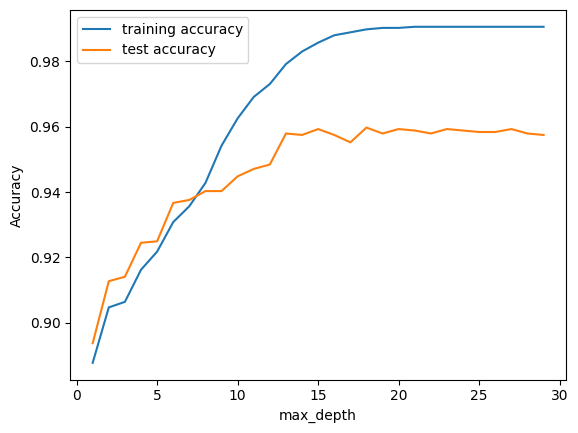

In [56]:
# Menentukan max_depth dengan akurasi terbesar
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))


#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

Max _depth dengan akurasi tertinggi adalah 8

In [57]:
# Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=8)
tree_model.fit(X_train, y_train)

# Memprediksi nilai target dari model
y_train_tree = tree_model.predict(X_train)
y_test_tree = tree_model.predict(X_test)

# Menghitung performa
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)

In [58]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_tree))

# Menyimpan hasil
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       956
           1       0.94      0.95      0.95      1255

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



### Random Forest

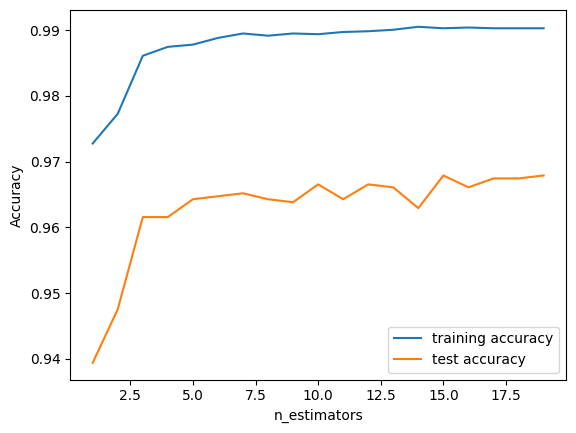

In [59]:
# Menentukan n_estimators dengan akurasi terbesar
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

n_estimators dengan akurasi tertinggi adalah 5

In [60]:
# Random Forest Model
forest_model = RandomForestClassifier(n_estimators=5)
forest_model.fit(X_train,y_train)

# Memprediksi nilai target dari model
y_train_forest = forest_model.predict(X_train)
y_test_forest = forest_model.predict(X_test)

# Menghitung performa
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)

In [61]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_forest))

# Menyimpan hasil
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



### Gradient Boosting

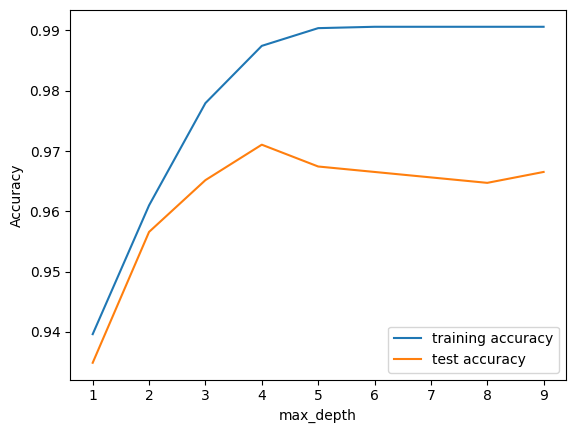

In [62]:
# Menentukan max_depth dengan akurasi terbesar
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

Max_depth dengan akurasi tertinggi adalah 3

In [63]:
# Gradient Boosting Classifier Model
gbc_model = GradientBoostingClassifier(max_depth=3,learning_rate=0.7)
gbc_model.fit(X_train,y_train)

# Memprediksi nilai target dari model
y_train_gbc = gbc_model.predict(X_train)
y_test_gbc = gbc_model.predict(X_test)

# Menghitung performa
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)

In [64]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_gbc))

# Menyimpan hasil
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.97      0.97      0.97      2211



### CatBoost

In [65]:
# catboost Model
cat_model = CatBoostClassifier(learning_rate  = 0.1)
cat_model.fit(X_train,y_train)

# Memprediksi nilai target dari model
y_train_cat = cat_model.predict(X_train)
y_test_cat = cat_model.predict(X_test)

# Menghitung performa
acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)

0:	learn: 0.5480538	total: 50.2ms	remaining: 50.1s
1:	learn: 0.4337748	total: 60.7ms	remaining: 30.3s
2:	learn: 0.3697514	total: 70.2ms	remaining: 23.3s
3:	learn: 0.3105084	total: 79.8ms	remaining: 19.9s
4:	learn: 0.2715007	total: 89.2ms	remaining: 17.8s
5:	learn: 0.2433223	total: 99ms	remaining: 16.4s
6:	learn: 0.2254893	total: 109ms	remaining: 15.4s
7:	learn: 0.2082963	total: 118ms	remaining: 14.7s
8:	learn: 0.1975992	total: 133ms	remaining: 14.7s
9:	learn: 0.1868770	total: 143ms	remaining: 14.2s
10:	learn: 0.1795134	total: 153ms	remaining: 13.7s
11:	learn: 0.1749100	total: 162ms	remaining: 13.4s
12:	learn: 0.1685586	total: 173ms	remaining: 13.2s
13:	learn: 0.1642018	total: 183ms	remaining: 12.9s
14:	learn: 0.1599999	total: 193ms	remaining: 12.7s
15:	learn: 0.1563166	total: 204ms	remaining: 12.5s
16:	learn: 0.1538434	total: 213ms	remaining: 12.3s
17:	learn: 0.1515084	total: 219ms	remaining: 12s
18:	learn: 0.1476302	total: 230ms	remaining: 11.9s
19:	learn: 0.1453111	total: 247ms	remai

In [66]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_cat))

# Menghitung performa
storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       956
           1       0.96      0.99      0.98      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



### Multi-layer

In [67]:
# Multi-layer Perceptron Model
mlp_model = MLPClassifier()
mlp_model.fit(X_train,y_train)

# Memprediksi nilai target dari model
y_train_mlp = mlp_model.predict(X_train)
y_test_mlp = mlp_model.predict(X_test)

# Menghitung performa
acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
# Menghitung clasification report pada model
print(metrics.classification_report(y_test, y_test_mlp))

# Menghitung performa
storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       956
           1       0.97      0.96      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# Comparision of Model Scores

In [69]:
# Membuat dataframe
hasil = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

# Menampilkan hasil dataframe
hasil

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.924,0.933,0.947,0.927
1,K-Nearest Neighbors,0.941,0.948,0.973,0.965
2,Support Vector Machine,0.957,0.963,0.982,0.966
3,Naive Bayes Classifier,0.583,0.420,0.291,0.996
4,Decision Tree,0.941,0.948,0.955,0.943
5,Random Forest,0.965,0.969,0.991,0.988
6,Gradient Boosting Classifier,0.965,0.970,0.983,0.978
7,CatBoost Classifier,0.972,0.976,0.994,0.987
8,Multi-layer Perceptron,0.961,0.965,0.976,0.993


In [70]:
# Mengurutkan dataframe berdasarkan akurasi
sorted_hasil=hasil.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

# Menampilkan dataframe hasil mengurutkan
sorted_hasil

,ML Model,Accuracy,f1_score,Recall,Precision
0,CatBoost Classifier,0.972,0.976,0.994,0.987
1,Gradient Boosting Classifier,0.965,0.970,0.983,0.978
2,Random Forest,0.965,0.969,0.991,0.988
3,Multi-layer Perceptron,0.961,0.965,0.976,0.993
4,Support Vector Machine,0.957,0.963,0.982,0.966
5,K-Nearest Neighbors,0.941,0.948,0.973,0.965
6,Decision Tree,0.941,0.948,0.955,0.943
7,Logistic Regression,0.924,0.933,0.947,0.927
8,Naive Bayes Classifier,0.583,0.420,0.291,0.996


## Storing Best Model

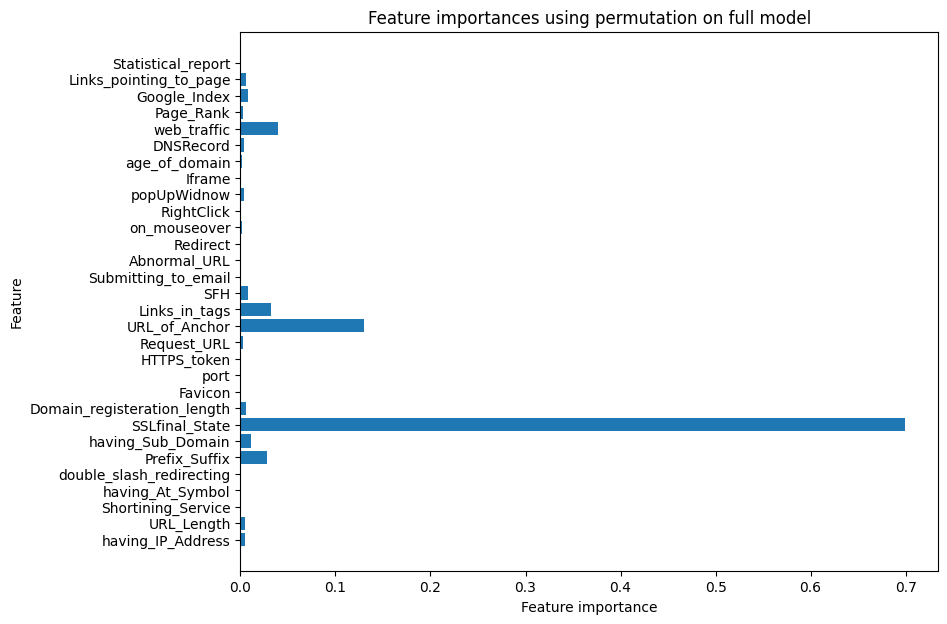

In [71]:
#  XGBoost Classifier Model
gbc_model = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc_model.fit(X_train,y_train)

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Decoding URL

In [72]:
pip install python-whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103247 sha256=7f1a7ecd72514785387a8e764c652b6a4b19853840967572018576d48e75f396
  Stored in directory: /root/.cache/pip/wheels/10/f1/87/145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
Successfully built python-whois


In [73]:
pip install python-googlesearch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.7 MB/s eta 0:00:00


In [74]:
import ipaddress, re, urllib.request, socket, requests, whois, ssl
from datetime import date
from dateutil.parser import parse as date_parse
from urllib.parse import urlparse
from bs4 import BeautifulSoup
from urllib import response


class FeatureExtraction:
    features = []
    def __init__(self,url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(response.text, 'html.parser')
        except:
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except:
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except:
            pass




        self.features.append(self.Having_IP_Address())
        self.features.append(self.URL_Length())
        self.features.append(self.Shortining_Service())
        self.features.append(self.having_At_Symbol())
        self.features.append(self.double_slash_redirecting())
        self.features.append(self.Prefix_Suffix())
        self.features.append(self.having_Sub_Domain())
        self.features.append(self.SSLfinal_State())
        self.features.append(self.Domain_registeration_length())
        self.features.append(self.Favicon())

        self.features.append(self.port())
        self.features.append(self.HTTPS_token())
        self.features.append(self.Request_URL())
        self.features.append(self.URL_of_Anchor())
        self.features.append(self.Links_in_tags())
        self.features.append(self.SFH())
        self.features.append(self.Submitting_to_email())
        self.features.append(self.Abnormal_URL())
        self.features.append(self.Redirect())
        self.features.append(self.on_mouseover())

        self.features.append(self.RightClick())
        self.features.append(self.popUpWidnow())
        self.features.append(self.Iframe())
        self.features.append(self.age_of_domain())
        self.features.append(self.DNSRecord())
        self.features.append(self.web_traffic())
        self.features.append(self.Page_Rank())
        self.features.append(self.Google_Index())
        self.features.append(self.Links_pointing_to_page())
        self.features.append(self.Statistical_report())


     # 1.Having_IP_Address
    def Having_IP_Address(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except:
            return 1

    # 2.URL_Length
    def URL_Length(self):
        if len(self.url) < 54:
            return 1
        if len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3.Shortining_Service
    def Shortining_Service(self):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', self.url)
        if match:
            return -1
        return 1

    # 4.having_At_Symbol
    def having_At_Symbol(self):
        if re.findall("@",self.url):
            return -1
        return 1

    # 5.double_slash_redirecting
    def double_slash_redirecting(self):
        if self.url.rfind('//')>6:
            return -1
        return 1

    # 6.Prefix_Suffix
    def Prefix_Suffix(self):
        try:
            match = re.findall('\-', self.domain)
            if match:
                return -1
            return 1
        except:
            return -1

    # 7.having_Sub_Domain
    def having_Sub_Domain(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8.SSLfinal_State
    def SSLfinal_State(self):
        try:
            domain = self.domain

            ctx = ssl.create_default_context()
            with ctx.wrap_socket(socket.socket(), server_hostname=domain) as s:
                s.connect((domain, 443))
                cert = s.getpeercert()

            issuer = dict(x[0] for x in cert['issuer'])
            issued_by = issuer['organizationName'].strip()

            # Check if the URL uses HTTPS
            if self.url.startswith('https://'):
                # Check if the issuer is trusted
                trusted_issuers = ['DigiCert Inc','DigiCert, Inc.', 'Google Trust Services LLC','Let\'s Encrypt','GlobalSign','Entrust Datacard Corporation','Comodo CA Limited','Sectigo Limited',
                                   'GoDaddy.com, LLC.','Trustwave Holdings, Inc.','CSC Security Solutions, Inc.','Network Solutions LLC']  # Trusted issuers organization name
                if issued_by in trusted_issuers:
                  print("Valid HTTPS, and trusted issuer")
                  return 1
                else:
                  print("Valid HTTPS, but issuer is not trusted")
                  return 0
            else:
                print("URL does not use HTTPS")
                return -1

        except Exception as e:
            print(e)
            return -1


    # 9.Domain_registeration_length
    def Domain_registeration_length(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            try:
                if(len(expiration_date)):
                    expiration_date = expiration_date[0]
            except:
                pass
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            age = (expiration_date.year-creation_date.year)*12+ (expiration_date.month-creation_date.month)
            if age >=12:
                return 1
            return -1
        except:
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or self.domain in head.link['href']:
                        return 1
            return -1
        except:
            return -1

    # 11. port
    def port(self):
        try:
            port = self.domain.split(":")
            if len(port)>1:
                return -1
            return 1
        except:
            return -1

    # 12. HTTPS_token
    def HTTPS_token(self):
        try:
            if 'https' in urlparse(self).netloc:
                return -1
            return 1
        except Exception as e:
            return -1

    # 13. Request_URL
    def Request_URL(self):
        try:
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for audio in self.soup.find_all('audio', src=True):
                dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
                if self.url in audio['src'] or self.domain in audio['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for embed in self.soup.find_all('embed', src=True):
                dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
                if self.url in embed['src'] or self.domain in embed['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for iframe in self.soup.find_all('iframe', src=True):
                dots = [x.start(0) for x in re.finditer('\.', iframe['src'])]
                if self.url in iframe['src'] or self.domain in iframe['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success/float(i) * 100
                if percentage < 22.0:
                    return 1
                elif((percentage >= 22.0) and (percentage < 61.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 14. URL_of_Anchor
    def URL_of_Anchor(self):
        try:
            i,unsafe = 0,0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (self.url in a['href'] or self.domain in a['href']):
                    unsafe = unsafe + 1
                i = i + 1

            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif ((percentage >= 31.0) and (percentage < 67.0)):
                    return 0
                else:
                    return -1
            except:
                return -1

        except:
            return -1

    # 15. Links_in_tags
    def Links_in_tags(self):
        try:
            i,success = 0,0

            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif((percentage >= 17.0) and (percentage < 81.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 16. SFH
    def SFH(self):
        try:
            if len(self.soup.find_all('form', action=True))==0:
                return 1
            else :
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except:
            return -1

    # 17. Submitting_to_email
    def Submitting_to_email(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soap):
                return -1
            else:
                return 1
        except:
            return -1

    # 18. Abnormal_URL
    def Abnormal_URL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except:
            return -1

    # 19. Redirect
    def Redirect(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except:
             return -1

    # 20. on_mouseover
    def on_mouseover(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 21. RightClick
    def RightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 22. popUpWidnow
    def popUpWidnow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 23. Iframe
    def Iframe(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 24. age_of_domain
    def age_of_domain(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 25. DNSRecord
    def DNSRecord(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 26. web_traffic
    def web_traffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + self.url).read(), "xml").find("REACH")['RANK']
            if (int(rank) < 100000):
                return 1
            return 0
        except :
            return -1

    # 27. Page_Rank
    def Page_Rank(self):
        try:
            rank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})

            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except:
            return -1


    # 28. Google_Index
    def Google_Index(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except:
            return 1

    # 29. Links_pointing_to_page
    def Links_pointing_to_page(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except:
            return -1

    # 30. Statistical_report
    def Statistical_report(self):
        try:
            url_match = re.search(
        'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', self.url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except:
            return 1

    def getFeaturesList(self):
        return self.features

# IMPLEMENTASI PICKLE

In [75]:
import pickle

# Pickle CatBoost Model
pickle.dump(cat_model, open('cat_model.pkl', 'wb'))

# Pickle Gradient Boost Model
pickle.dump(gbc_model, open('gbc_model.pkl', 'wb'))

# Pickle Multi-Layer Model
pickle.dump(mlp_model, open('mlp_model.pkl', 'wb'))

# Testing

In [76]:
def is_phishing_gbc(x):
  #LOAD PICKLE
  file_gbc = open("gbc_model.pkl","rb")
  gbc = pickle.load(file_gbc)
  file_gbc.close

  # PREDIKSI GRADIENT BOOST
  prediction = gbc.predict(x)
  safe_probability = gbc.predict_proba(x)[0,1] * 100
  malicious_probability = gbc.predict_proba(x)[0,0] * 100

  print("==== Gradient Boost Classifier ====")
  if prediction == 1:
    print("This URL appears to be safe.")
  else:
    print("Phishing Alert! This URL may be malicious.")

  if safe_probability > malicious_probability:
    print(f"The link is {safe_probability:.2f}% likely to be safe.")
  elif safe_probability < malicious_probability:
    print(f"The link is {malicious_probability:.2f}% likely to be malicious.\n")
  elif safe_probability == malicious_probability:
    print(f"The link is {safe_probability:.2f}% likely to be safe.")
    print(f"The link is {malicious_probability:.2f}% likely to be malicious.\n")

def is_phishing_cat(x):
  file_cat = open("cat_model.pkl","rb")
  cat = pickle.load(file_cat)
  file_cat.close

  # PREDIKSI CATBOOST
  prediction = cat.predict(x)
  safe_probability = cat.predict_proba(x)[0,1] * 100
  malicious_probability = cat.predict_proba(x)[0,0] * 100

  print("==== CatBoost Classifier ====")
  if prediction == 1:
    print("This URL appears to be safe.")
  else:
    print("Phishing Alert! This URL may be malicious.")

  if safe_probability > malicious_probability:
    print(f"The link is {safe_probability:.2f}% likely to be safe.")
  elif safe_probability < malicious_probability:
    print(f"The link is {malicious_probability:.2f}% likely to be malicious.\n")
  elif safe_probability == malicious_probability:
    print(f"The link is {safe_probability:.2f}% likely to be safe.")
    print(f"The link is {malicious_probability:.2f}% likely to be malicious.\n")

def is_phishing_mlp(x):
  file_mlp = open("mlp_model.pkl","rb")
  mlp = pickle.load(file_mlp)
  file_mlp.close
  # PREDIKSI MULTI-LAYER
  y_pro_non_phishing_mlp = mlp.predict_proba(x)[0,1]
  pred_mlp = y_pro_non_phishing_mlp*100

  prediction = mlp.predict(x)
  safe_probability = mlp.predict_proba(x)[0,1] * 100
  malicious_probability = mlp.predict_proba(x)[0,0] * 100

  print("==== Multi Layer Precepton Classifier ====")
  if prediction == 1:
    print("This URL appears to be safe.")
  else:
    print("Phishing Alert! This URL may be malicious.")

  if safe_probability > malicious_probability:
    print(f"The link is {safe_probability:.2f}% likely to be safe.")
  elif safe_probability < malicious_probability:
    print(f"The link is {malicious_probability:.2f}% likely to be malicious.\n")
  elif safe_probability == malicious_probability:
    print(f"The link is {safe_probability:.2f}% likely to be safe.")
    print(f"The link is {malicious_probability:.2f}% likely to be malicious.\n")


In [77]:
url="http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/."
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30)

gbc_pred = is_phishing_gbc(x)
cat_pred = is_phishing_cat(x)
mlp_pred = is_phishing_mlp(x)

print("TESTING LINK : ", url)

[Errno -2] Name or service not known
==== Gradient Boost Classifier ====
Phishing Alert! This URL may be malicious.
The link is 99.99% likely to be malicious.

==== CatBoost Classifier ====
Phishing Alert! This URL may be malicious.
The link is 99.98% likely to be malicious.

==== Multi Layer Precepton Classifier ====
Phishing Alert! This URL may be malicious.
The link is 99.99% likely to be malicious.

TESTING LINK :  http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does 